In [1]:
import requests
import folium

def extract_osm_geodata(query):
    """
    Extracts geodata from OpenStreetMap using the Overpass API.
    Parameters:
    query (str): The Overpass API query string to execute.
    Returns:
    dict: GeoJSON data retrieved by the query.
    """
    # Define the Overpass API URL
    overpass_url = "https://lz4.overpass-api.de/api/interpreter"
    
    # Define the parameters for the GET request
    params = {'data': query}
    
    # Send a GET request to the Overpass API with the query
    response = requests.get(overpass_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

Subway data successfully extracted!


In [ ]:
# Query to extract subway stations in London
query = """
[out:json];
area[name="London"]->.searchArea;
relation["route"~"subway"](area.searchArea);
out meta;
>;
out body;
"""
subway_london_data = extract_osm_geodata(query)

In [5]:
def extract_route_elements(osm_data):
    """
    Extracts route elements from the OpenStreetMap data response.
    Parameters:
    osm_data (dict): The JSON response data from the Overpass API.
    Returns:
    list: A list of route elements containing 'tags' with 'route' information.
    """
    route_elements = [element for element in osm_data['elements'] if 'tags' in element and 'route' in element['tags']]
    return route_elements

# Call the function to extract route elements from the OpenStreetMap data for London's subway
route_elements =  extract_route_elements(subway_london_data)

# Visualize the route of the list
route_elements[0]

{'type': 'relation',
 'id': 102762,
 'timestamp': '2024-08-28T12:19:33Z',
 'version': 31,
 'changeset': 155877651,
 'user': 'Robert Whittaker',
 'uid': 84263,
 'members': [{'type': 'node', 'ref': 178805960, 'role': 'stop'},
  {'type': 'node', 'ref': 5473272644, 'role': 'stop'},
  {'type': 'relation', 'ref': 8104235, 'role': 'platform'},
  {'type': 'way', 'ref': 956297878, 'role': ''},
  {'type': 'way', 'ref': 1137686967, 'role': ''},
  {'type': 'way', 'ref': 9028945, 'role': ''},
  {'type': 'way', 'ref': 110306471, 'role': ''},
  {'type': 'way', 'ref': 110306472, 'role': ''},
  {'type': 'way', 'ref': 569024601, 'role': ''}],
 'tags': {'brand': 'Transport for London',
  'brand:wikidata': 'Q682520',
  'colour': '#93CEBA',
  'from': 'Waterloo',
  'name': 'Waterloo & City line: Waterloo → Bank',
  'network': 'London Underground',
  'network:wikidata': 'Q20075',
  'network:wikipedia': 'en:London Underground',
  'operator': 'Transport for London',
  'operator:wikidata': 'Q682520',
  'public_

In [6]:
def extract_node_elements(osm_data):
    """
    Extracts node elements from the OpenStreetMap data response.
    Parameters:
    osm_data (dict): The JSON response data from the Overpass API.
    Returns:
    dict: A dictionary where the keys are node IDs and the values are the corresponding node elements.
    """
    node_elements = {element['id']: element for element in osm_data['elements'] if element['type'] == 'node'}
    return node_elements

# Call the function to extract node elements from the OpenStreetMap data for Hamburg's subway
node_elements = extract_node_elements(subway_london_data)

# Visualize the node_elements list
node_elements

{107802: {'type': 'node', 'id': 107802, 'lat': 51.5084826, 'lon': -0.1317462},
 108263: {'type': 'node', 'id': 108263, 'lat': 51.5099056, 'lon': -0.1361704},
 108297: {'type': 'node', 'id': 108297, 'lat': 51.4996648, 'lon': -0.1328552},
 110248: {'type': 'node', 'id': 110248, 'lat': 51.5173658, 'lon': -0.0666815},
 780857: {'type': 'node', 'id': 780857, 'lat': 51.5048531, 'lon': -0.2266189},
 780864: {'type': 'node', 'id': 780864, 'lat': 51.5030785, 'lon': -0.2268488},
 780900: {'type': 'node', 'id': 780900, 'lat': 51.507776, 'lon': -0.2259226},
 780909: {'type': 'node', 'id': 780909, 'lat': 51.5090645, 'lon': -0.2250738},
 780911: {'type': 'node', 'id': 780911, 'lat': 51.5098246, 'lon': -0.2241983},
 816478: {'type': 'node', 'id': 816478, 'lat': 51.5117186, 'lon': -0.2203473},
 1142931: {'type': 'node',
  'id': 1142931,
  'lat': 51.5147919,
  'lon': -0.2160652},
 1142935: {'type': 'node',
  'id': 1142935,
  'lat': 51.5157867,
  'lon': -0.2147079},
 1142939: {'type': 'node',
  'id': 11

In [7]:
def extract_route_elements(osm_data):
    """
    Extracts route elements from the OpenStreetMap data response.
    Parameters:
    osm_data (dict): The JSON response data from the Overpass API.
    Returns:
    list: A list of route elements containing 'tags' with 'route' information.
    """
    route_elements = [element for element in osm_data['elements'] if 'tags' in element and 'route' in element['tags']]
    return route_elements

# Call the function to extract route elements from the OpenStreetMap data for London's subway
route_elements =  extract_route_elements(subway_london_data)

# Visualize the route of the list
route_elements[0]

{'type': 'relation',
 'id': 102762,
 'timestamp': '2024-08-28T12:19:33Z',
 'version': 31,
 'changeset': 155877651,
 'user': 'Robert Whittaker',
 'uid': 84263,
 'members': [{'type': 'node', 'ref': 178805960, 'role': 'stop'},
  {'type': 'node', 'ref': 5473272644, 'role': 'stop'},
  {'type': 'relation', 'ref': 8104235, 'role': 'platform'},
  {'type': 'way', 'ref': 956297878, 'role': ''},
  {'type': 'way', 'ref': 1137686967, 'role': ''},
  {'type': 'way', 'ref': 9028945, 'role': ''},
  {'type': 'way', 'ref': 110306471, 'role': ''},
  {'type': 'way', 'ref': 110306472, 'role': ''},
  {'type': 'way', 'ref': 569024601, 'role': ''}],
 'tags': {'brand': 'Transport for London',
  'brand:wikidata': 'Q682520',
  'colour': '#93CEBA',
  'from': 'Waterloo',
  'name': 'Waterloo & City line: Waterloo → Bank',
  'network': 'London Underground',
  'network:wikidata': 'Q20075',
  'network:wikipedia': 'en:London Underground',
  'operator': 'Transport for London',
  'operator:wikidata': 'Q682520',
  'public_

In [8]:
import networkx as nx

def create_route_graph(route_elements, node_elements):
    """
    Creates a graph of routes with stop nodes and edges between consecutive stops.
    Parameters:
    route_elements (list): A list of route elements containing 'members' and 'tags'.
    node_elements (dict): A dictionary of node elements with their IDs as keys.
    Returns:
    nx.Graph: A NetworkX graph object representing the routes and stop nodes.
    """
    # Create a graph object
    G = nx.Graph()

    for route in route_elements:
        stop_nodes = [member for member in route['members'] if 'stop' in member['role']]
        
        # Add nodes to the graph
        for node in stop_nodes:
            ref = node['ref']
            if ref in node_elements:
                node_data = node_elements[ref]
                name = node_data['tags'].get('name', str(ref))
                colour = route['tags'].get('colour', '#808080')  # Default gray color if no color is defined
                
                G.add_node(ref, pos=(node_data['lon'], node_data['lat']), name=name, colour=colour)
        
        # Add edges between consecutive stop nodes
        for i in range(len(stop_nodes) - 1):
            G.add_edge(stop_nodes[i]['ref'], stop_nodes[i + 1]['ref'])
    
    return G

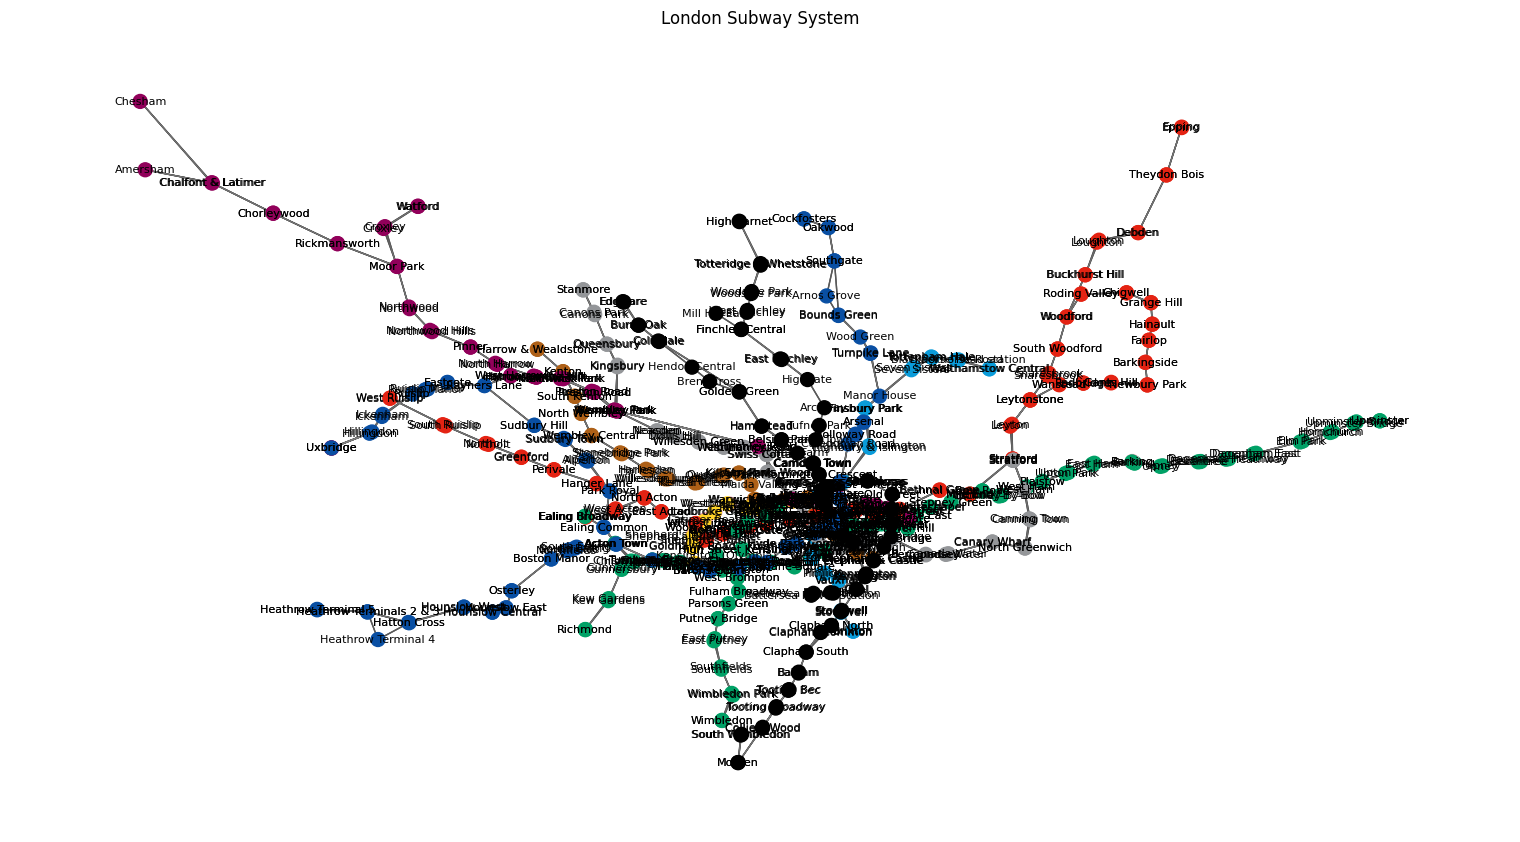

In [9]:
import matplotlib.pyplot as plt

def visualize_graph(G, title):
    """
    Visualizes the graph with nodes and edges.
    Parameters:
    G (nx.Graph): A NetworkX graph object representing the routes and stop nodes.
    Returns:
    None: Displays a plot of the graph.
    """
    # Set the plot size
    plt.figure(figsize=(15, 8))  # Adjust the width and height as needed

    # Draw the graph with nodes and edges
    pos = nx.get_node_attributes(G, 'pos')
    node_labels = nx.get_node_attributes(G, 'name')
    node_colours = list(nx.get_node_attributes(G, 'colour').values())
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=100, node_color=node_colours, font_size=8)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
    plt.title(title)
    plt.show()

# Create the graph for the Hamburg subway system
subway_london_G = create_route_graph(route_elements, node_elements)

# Visualize the graph with a title
visualize_graph(subway_london_G, 'London Subway System')

In [16]:
import folium

def visualize_graph_on_folium(G, title, map_center=(51.509865, -0.118092), zoom_start=12):
    """
    Visualizes a NetworkX graph on an interactive Folium map.
    Parameters:
    G (nx.Graph): A NetworkX graph object representing the subway network.
    title (str): Title for the map.
    map_center (tuple): Latitude and longitude for centering the map.
    zoom_start (int): Initial zoom level for the map.
    Returns:
    folium.Map: A Folium map object with the graph plotted.
    """
    # Create a Folium map centered on the specified coordinates
    subway_map = folium.Map(location=map_center, zoom_start=zoom_start)
    
    # Get positions and attributes from the graph
    pos = nx.get_node_attributes(G, 'pos')  # Node positions
    node_colours = nx.get_node_attributes(G, 'colour')  # Node colors
    node_names = nx.get_node_attributes(G, 'name')  # Node names
    
    # Add nodes as markers
    for node, coords in pos.items():
        name = node_names.get(node, "Unnamed Station")
        colour = node_colours.get(node, "#000000")  # Default black if no color specified
        folium.CircleMarker(
            location=(coords[1], coords[0]),  # Folium uses (lat, lon)
            radius=5,
            color=colour,
            fill=True,
            fill_opacity=0.7,
            popup=folium.Popup(name, max_width=300)
        ).add_to(subway_map)
    
    # Add edges as polylines
    for edge in G.edges():
        coord1 = pos[edge[0]]
        coord2 = pos[edge[1]]
        colour = node_colours.get(edge[0], "gray")  # Use the color of the first node in the edge
        folium.PolyLine(
            locations=[(coord1[1], coord1[0]), (coord2[1], coord2[0])],  # Folium uses (lat, lon)
            color=colour,
            weight=2,
            opacity=0.6
        ).add_to(subway_map)
    
    # Add a title to the map (via a custom HTML overlay)
    title_html = f'''
         <h3 align="center" style="font-size:16px"><b>{title}</b></h3>
         '''
    subway_map.get_root().html.add_child(folium.Element(title_html))
    
    return subway_map

# Create the Folium map
london_subway_map = visualize_graph_on_folium(subway_london_G, "London Subway Network")

# Save the map to an HTML file
london_subway_map.save("london_subway_network.html")
print("Map saved as 'london_subway_network.html'!")

london_subway_map

Map saved as 'london_subway_network.html'!
